# A simple OCR(Optical character recognition) model using ResNet framework


<span style="text-decoration: underline; font-size: 18px;">The main objective of this project is to identify the handwritten english characters and obtain text output.</span>



### 1. Getting the modules imported.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

### 2. Defining a function to load and preprocess images.

In [2]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    
    img_array = img_to_array(img)
    
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    return img_array

### 3. Defining the path of dataset for future usage.

In [3]:
base_path = r"C:\Users\Lenovo\OneDrive\Desktop\dataset\captcha\Img"

### 4. Instantiating a class for training data augmentation.

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### 5. Instantiating a class for validation data with no augmentation.

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

### 6. Creating training data batches.

In [6]:
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 3410 images belonging to 62 classes.


### 7. Creating validation data batches.

In [7]:
validation_generator = val_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' 
)

Found 0 images belonging to 62 classes.


### 8. Finding number of classes and instantiate the ResNet50 model(a pretrained model within tensorflow).

In [8]:
num_classes = len(train_generator.class_indices)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### 9. Adding 'Dense' layers for classification of the data.

In [9]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

### 10. Freezing the base model layers.

In [10]:
for layer in base_model.layers:
    layer.trainable = False

### 11. Compiling the model.

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 12. Training the model.

In [12]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


107/107 [==============================] - 92s 842ms/step - loss: 4.0240 - accuracy: 0.0455
Epoch 2/10
107/107 [==============================] - 95s 887ms/step - loss: 3.6472 - accuracy: 0.0930
Epoch 3/10
107/107 [==============================] - 93s 863ms/step - loss: 3.4216 - accuracy: 0.1111
Epoch 4/10
107/107 [==============================] - 92s 857ms/step - loss: 3.2241 - accuracy: 0.1487
Epoch 5/10
107/107 [==============================] - 98s 916ms/step - loss: 3.0768 - accuracy: 0.1762
Epoch 6/10
107/107 [==============================] - 95s 882ms/step - loss: 2.9178 - accuracy: 0.2018
Epoch 7/10
107/107 [==============================] - 93s 867ms/step - loss: 2.8173 - accuracy: 0.2208
Epoch 8/10
107/107 [==============================] - 93s 868ms/step - loss: 2.7235 - accuracy: 0.2364
Epoch 9/10
107/107 [==============================] - 93s 871ms/step - loss: 2.6839 - accuracy: 0.2522
Epoch 10/10
107/107 [==============================] - 93s 863ms/step -

### 13. Loading the image to be recognized.

In [16]:
test_image = load_and_preprocess_image(r"C:\Users\Lenovo\OneDrive\Desktop\dataset\captcha\Img\Q\img027-013.png")
test_image = test_image.squeeze()  
test_image = test_image.reshape((1,) + test_image.shape)

### 14. Predicting the results.

In [17]:
prediction = model.predict(test_image)
predicted_class_index = prediction.argmax(axis=1)
class_names = sorted(os.listdir(base_path))
predicted_class_name = class_names[predicted_class_index[-1]]

1/1 [==============================] - 0s 61ms/step


### 15. Displaying the results.

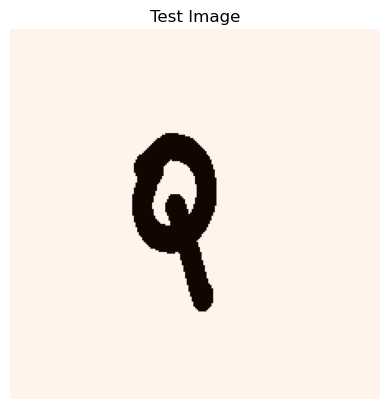

The predicted class is: Q


In [18]:
def display_image_with_prediction(test_image, predicted_class_name):
    test_image_pil = array_to_img(test_image[0])

    plt.imshow(test_image_pil)
    plt.title('Test Image')
    plt.axis('off')
    plt.show()

    print(f'The predicted class is: {predicted_class_name}')
    
    
#Just an example
display_image_with_prediction(test_image, predicted_class_name)
